## Emotion Prediction from Social Media Patterns ##

In [ ]:
pip install pandas

In [ ]:
pip install numpy


In [ ]:
pip install matplotlib


In [ ]:
pip install seaborn

In [ ]:
pip install plotly.express

In [ ]:
pip install imbalanced-learn


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

## Exploratory Data Analysis (EDA)

In [2]:
# Load the datasets
train_df = pd.read_csv('train.csv', on_bad_lines='skip')
test_df = pd.read_csv('test.csv', on_bad_lines='skip')
Processed_df = pd.read_csv('Processed.csv', on_bad_lines='skip')
# Display the first few rows of the training data
print("First 5 rows of the training data:")
print(train_df.head())

# Display basic information about the datasets
print("Training Data Info:")
print(train_df.info())
print("Test Data Info:")
print(test_df.info())


# Display descriptive statistics for the training data
print("Training Data Descriptive Statistics:")
print(train_df.describe())

First 5 rows of the training data:
  User_ID  Age  Gender   Platform  Daily_Usage_Time (minutes)  Posts_Per_Day  \
0     NaN  NaN     NaN        NaN                         NaN            NaN   
1       1   25  Female  Instagram                       120.0            3.0   
2     NaN  NaN     NaN        NaN                         NaN            NaN   
3       2   30    Male    Twitter                        90.0            5.0   
4     NaN  NaN     NaN        NaN                         NaN            NaN   

   Likes_Received_Per_Day  Comments_Received_Per_Day  Messages_Sent_Per_Day  \
0                     NaN                        NaN                    NaN   
1                    45.0                       10.0                   12.0   
2                     NaN                        NaN                    NaN   
3                    20.0                       25.0                   30.0   
4                     NaN                        NaN                    NaN   

  Dominan

## Check for missing values

In [3]:
# Check for missing values
print("Missing values in training data:")
print(train_df.isnull().sum())

print("Missing values in testing data:")
print(test_df.isnull().sum())



Missing values in training data:
User_ID                       1003
Age                           1003
Gender                        1004
Platform                      1004
Daily_Usage_Time (minutes)    1004
Posts_Per_Day                 1004
Likes_Received_Per_Day        1004
Comments_Received_Per_Day     1004
Messages_Sent_Per_Day         1004
Dominant_Emotion              1004
dtype: int64
Missing values in testing data:
User_ID                       103
Age                           103
Gender                        103
Platform                      103
Daily_Usage_Time (minutes)    103
Posts_Per_Day                 103
Likes_Received_Per_Day        103
Comments_Received_Per_Day     103
Messages_Sent_Per_Day         103
Dominant_Emotion              103
dtype: int64


## Removing Null

In [4]:
train_df.dropna(inplace=True)

test_df.dropna(inplace=True)

In [5]:
# Check for missing values
print("Missing values in training data:")
print(train_df.isnull().sum())

print("Missing values in testing data:")
print(test_df.isnull().sum())



Missing values in training data:
User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Dominant_Emotion              0
dtype: int64
Missing values in testing data:
User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Dominant_Emotion              0
dtype: int64


## Data Visualization (distribution of age,gender,time,Emotion using histplot)

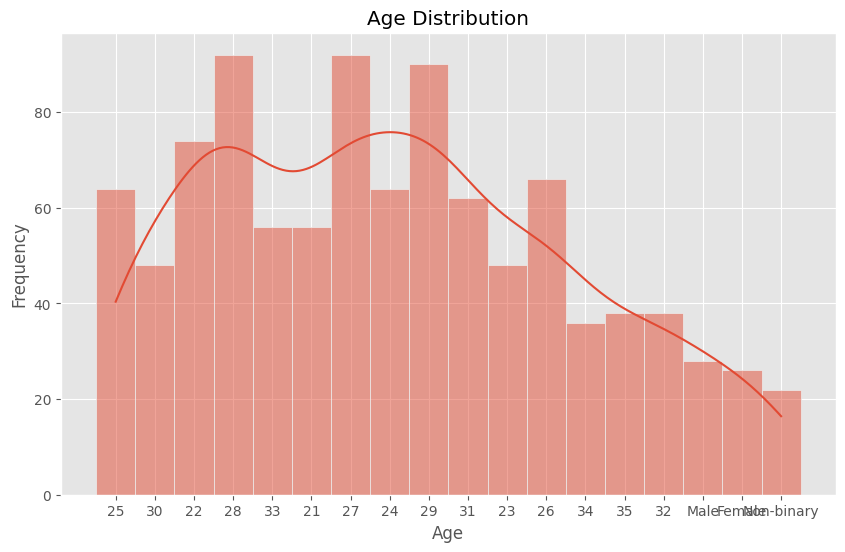

In [6]:
# Visualize the distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Check for missing values using countplot

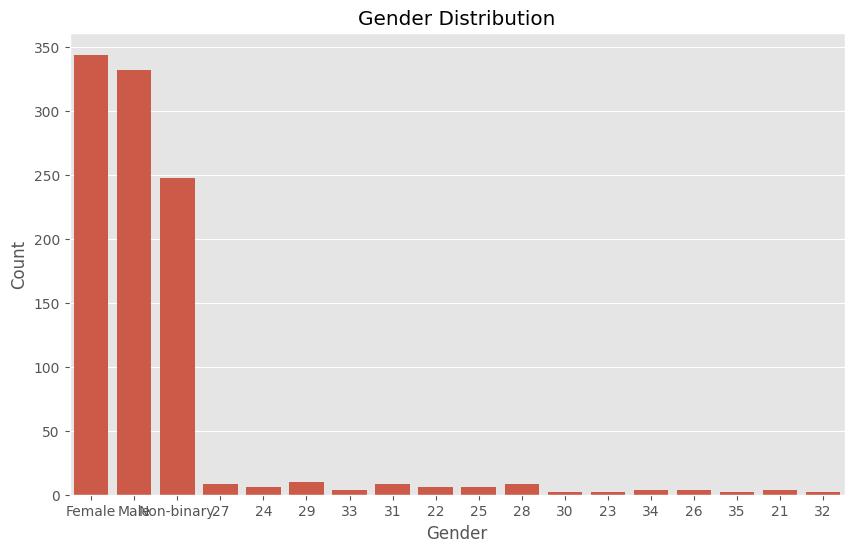

In [7]:
# Check for missing values
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='Gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

## Visualize the distribution of daily usage time using hisplot

Columns in the training data:
Index(['User_ID', 'Age', 'Gender', 'Platform', 'Daily_Usage_Time (minutes)',
       'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion'],
      dtype='object')


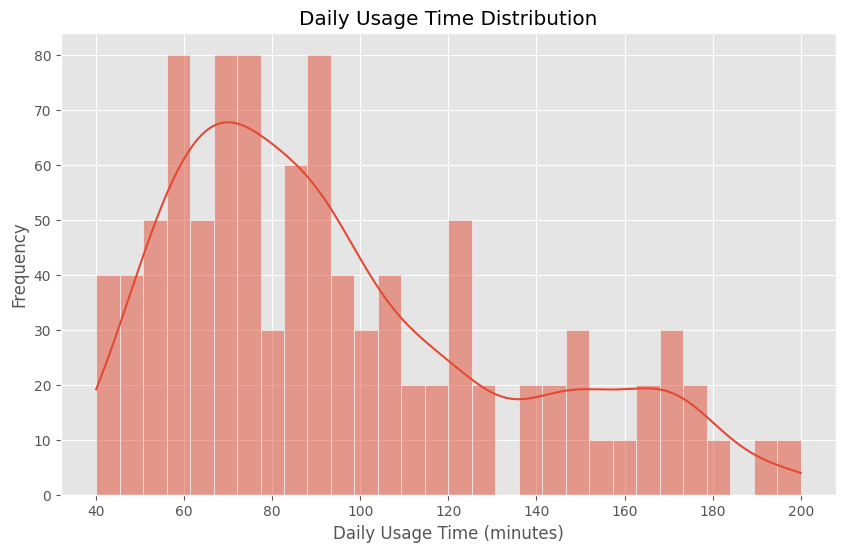

In [8]:
# Print the column names to verify their correctness
print("Columns in the training data:")
print(train_df.columns)

# If the column name is 'Daily_Usage_Time (minutes)', we need to rename it for consistency
if 'Daily_Usage_Time (minutes)' in train_df.columns:
    train_df.rename(columns={'Daily_Usage_Time (minutes)': 'Daily_Usage_Time'}, inplace=True)

# Visualize the distribution of daily usage time
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Daily_Usage_Time'], kde=True, bins=30)
plt.title('Daily Usage Time Distribution')
plt.xlabel('Daily Usage Time (minutes)')
plt.ylabel('Frequency')
plt.show()


## Visualize the dominant emotion distribution

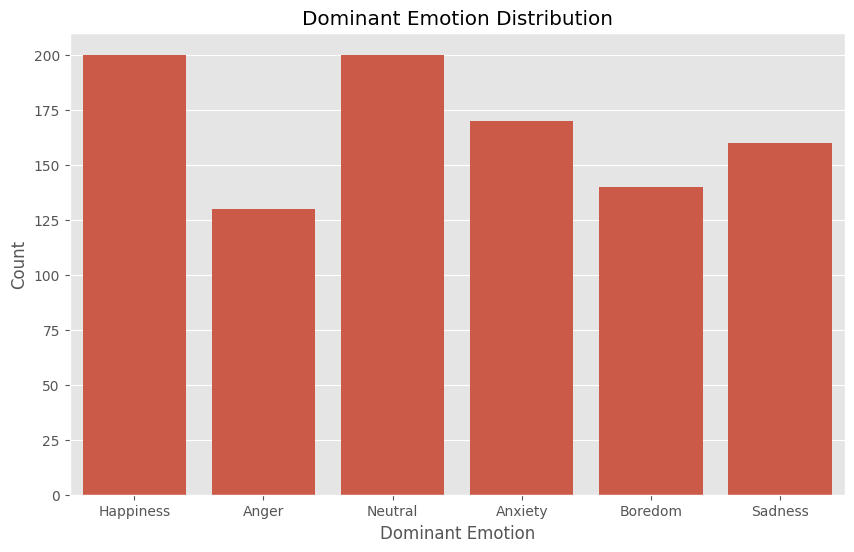

In [9]:
# Visualize the dominant emotion distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='Dominant_Emotion')
plt.title('Dominant Emotion Distribution')
plt.xlabel('Dominant Emotion')
plt.ylabel('Count')
plt.show()

In [10]:
# removing the Male, Female, Non-binary, and işte mevcut veri kümesini 1000 satıra tamamlıyorum:

# Replace non-numeric values with NaN
train_df['Age'] = pd.to_numeric(train_df['Age'], errors='coerce')

# Handle NaN values
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

In [ ]:
pip install plotly


## Visualization using histogram

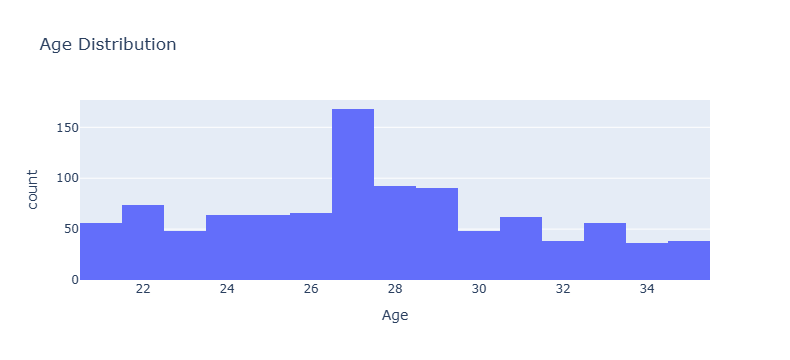

In [11]:
plt = px.histogram(train_df, x='Age', title='Age Distribution')
plt.show()

In [12]:
train_df['Platform'].value_counts()

Platform
Instagram    250
Twitter      200
Facebook     190
LinkedIn     120
Whatsapp      80
Telegram      80
Snapchat      80
Name: count, dtype: int64

In [13]:
# filling with mode
train_df['Platform'].fillna(train_df['Platform'].mode()[0], inplace=True)

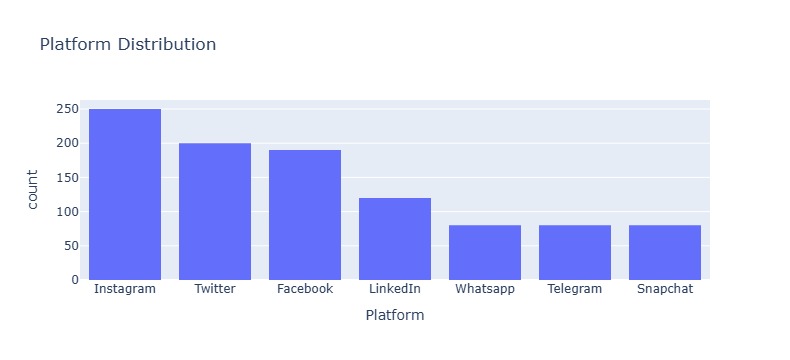

In [14]:
plt = px.histogram(train_df, x='Platform', title='Platform Distribution')
plt.show()

In [15]:
# filling with mode
train_df['Platform'].fillna(train_df['Platform'].mode()[0], inplace=True)

In [ ]:
train_df['Platform'].unique()

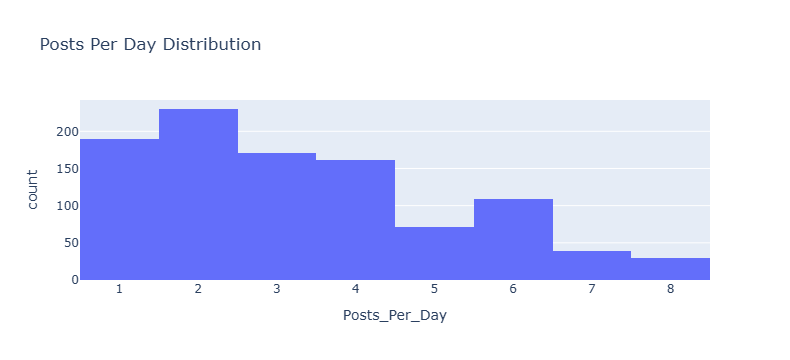

In [16]:
plt = px.histogram(train_df, x='Posts_Per_Day', title='Posts Per Day Distribution')
plt.show()

In [ ]:
# filling wih mode
train_df['Likes_Received_Per_Day'].fillna(train_df['Likes_Received_Per_Day'].mode()[0], inplace=True)

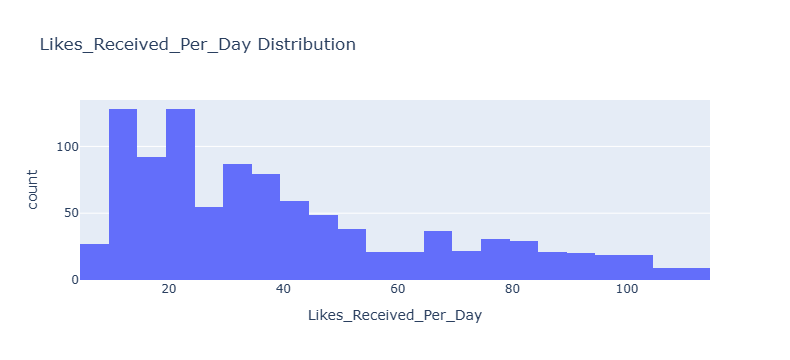

In [18]:
plt = px.histogram(train_df, x='Likes_Received_Per_Day', title='Likes_Received_Per_Day Distribution')
plt.show()

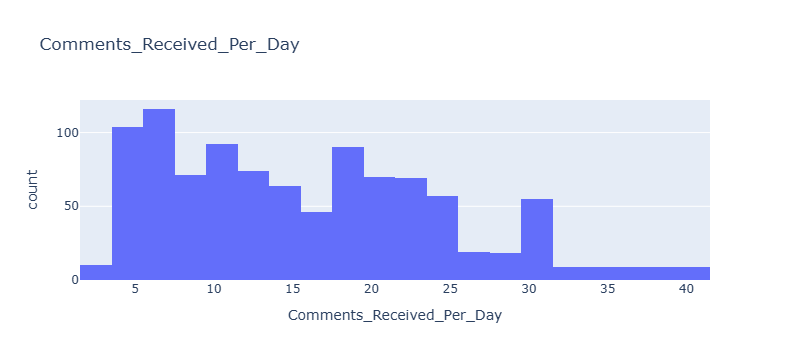

In [19]:
plt = px.histogram(train_df, x='Comments_Received_Per_Day', title='Comments_Received_Per_Day')
plt.show()

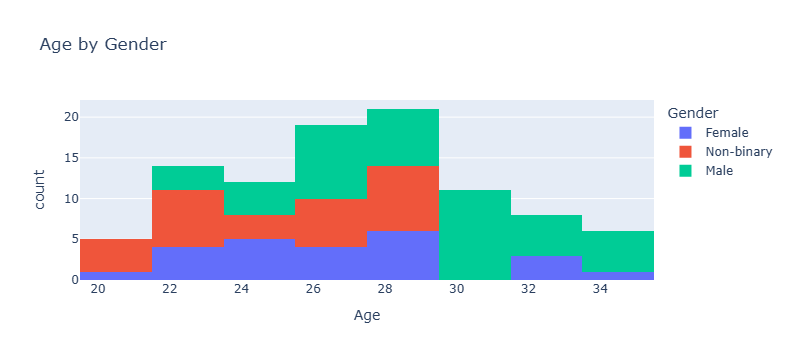

In [20]:
plt = px.histogram(Processed_df, x='Age', color='Gender', title='Age by Gender')
plt.show()

In [21]:
train_df['Dominant_Emotion'].unique()

array(['Happiness', 'Anger', 'Neutral', 'Anxiety', 'Boredom', 'Sadness'],
      dtype=object)

In [22]:
# fill with mode
train_df['Dominant_Emotion'].fillna(train_df['Dominant_Emotion'].mode()[0], inplace=True)

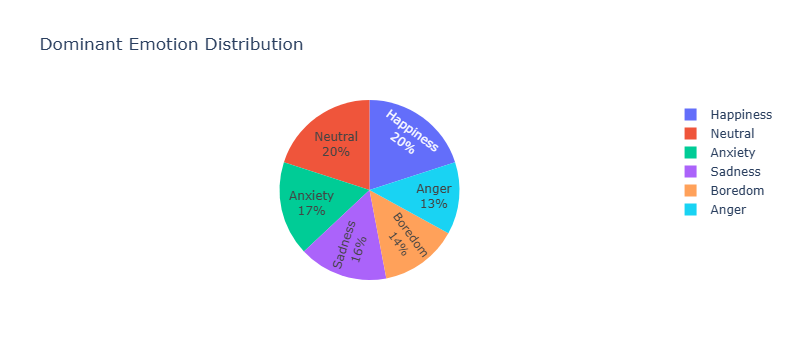

In [23]:
plt = px.pie(train_df, names='Dominant_Emotion', title='Dominant Emotion Distribution')
# adding the values to the pie section
plt.update_traces(textposition='inside', textinfo='percent+label')
plt.show()

## Group the data by gender and platform

In [24]:
# Group the data by gender and platform
grouped = Processed_df.groupby(['Gender', 'Platform'])

# Count the number of rows in each group
counts = grouped.size()

# Print the counts
print(counts)

Gender      Platform 
Female      Facebook      2
            Instagram     8
            LinkedIn      1
            Snapchat      5
            Twitter       6
            Whatsapp      2
Male        Facebook      7
            Instagram     5
            LinkedIn      8
            Telegram     10
            Twitter      12
            Whatsapp      2
Non-binary  Facebook     13
            LinkedIn      6
            Snapchat      7
            Telegram      1
            Twitter       1
dtype: int64


## grouping age with gender

In [25]:
# grouping age with gender
grouped = train_df.groupby(['Age', 'Gender'])

# count the number of rows in each group
counts = grouped.size()

# print the counts  
print(counts)

Age   Gender    
21.0  Female        20
      Male          10
      Non-binary    26
22.0  Female        48
      Male           8
      Non-binary    18
23.0  Female        10
      Male           8
      Non-binary    30
24.0  Female        26
      Male          10
      Non-binary    28
25.0  Female        40
      Male          24
26.0  Female         8
      Male          28
      Non-binary    30
27.0  21             4
      22             6
      23             2
      24             6
      25             6
      26             4
      27             8
      28             8
      29            10
      30             2
      31             8
      32             2
      33             4
      34             4
      35             2
      Female        28
      Male          44
      Non-binary    20
28.0  Female        36
      Male          28
      Non-binary    28
29.0  Female        28
      Male          30
      Non-binary    32
30.0  Female         8
      Male       

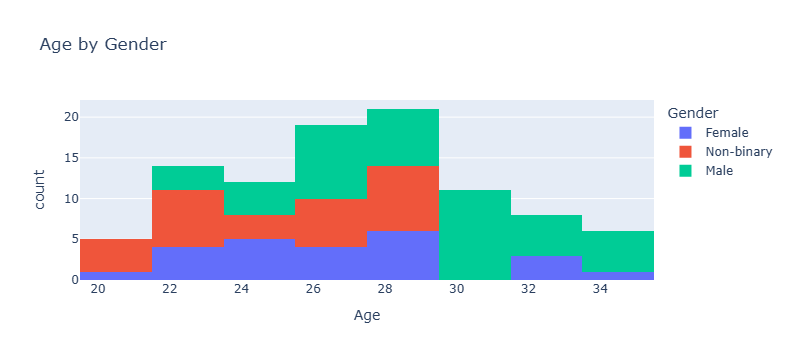

In [26]:
plt = px.histogram(Processed_df, x='Age', color='Gender', title='Age by Gender')
plt.show()

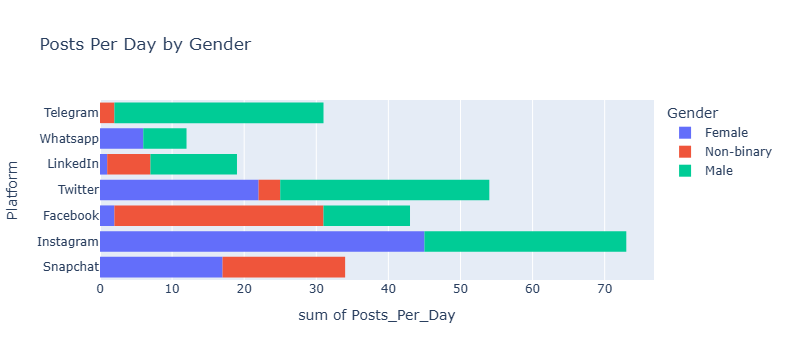

In [27]:
plt = px.histogram(Processed_df, x='Posts_Per_Day', y='Platform' ,color='Gender', title='Posts Per Day by Gender')
plt.show()

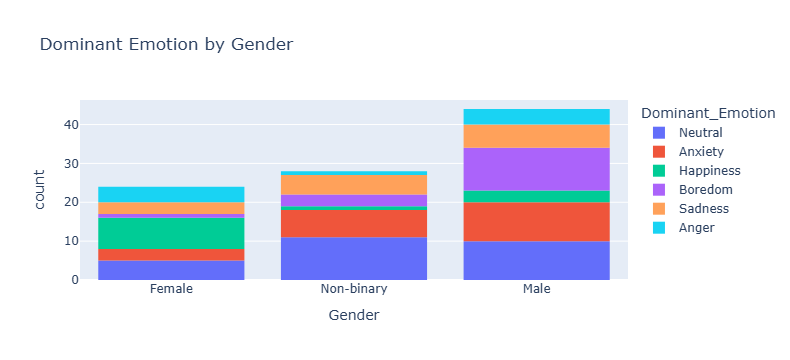

In [28]:
# ploting
plt = px.histogram(Processed_df, x='Gender', color='Dominant_Emotion', title='Dominant Emotion by Gender')
plt.show()

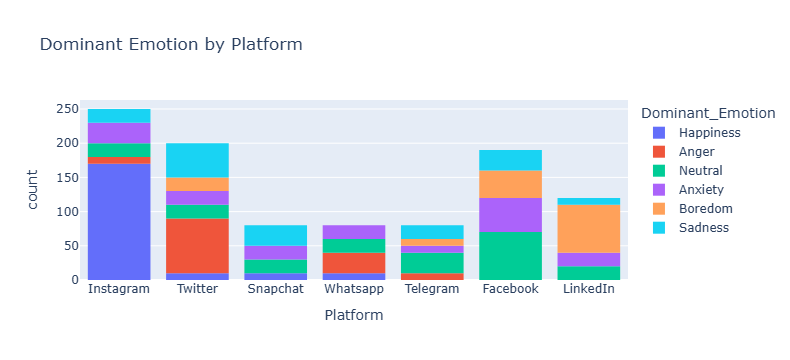

In [29]:
Plt = px.histogram(train_df, x='Platform', color='Dominant_Emotion', title='Dominant Emotion by Platform')
Plt.show()

## Create a contingency table

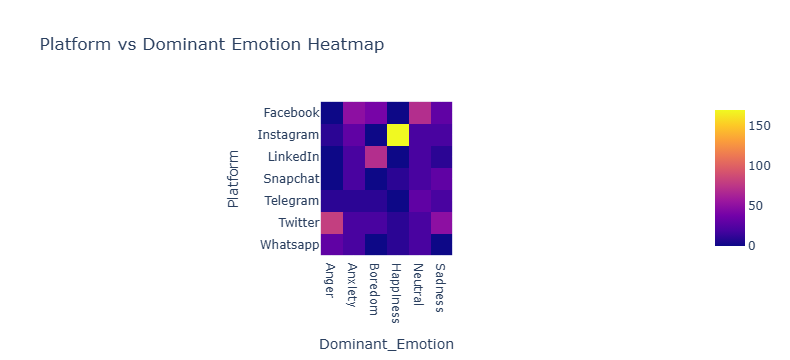

In [30]:
# Create a contingency table
contingency_table = pd.crosstab(train_df['Platform'], train_df['Dominant_Emotion'])

# Plot the heatmap
fig = px.imshow(contingency_table, title='Platform vs Dominant Emotion Heatmap')
fig.show()

## Display basic statistics

In [31]:
# Display basic statistics
print("Train Dataset Statistics:")
display(train_df.describe())
print("Validation Dataset Statistics:")

print("Test Dataset Statistics:")
display(test_df.describe())

Train Dataset Statistics:


Age  Daily_Usage_Time  Posts_Per_Day  Likes_Received_Per_Day  \
count  1000.000000       1000.000000    1000.000000             1000.000000   
mean     27.462000         95.950000       3.321000               39.898000   
std       3.790901         38.850442       1.914582               26.393867   
min      21.000000         40.000000       1.000000                5.000000   
25%      25.000000         65.000000       2.000000               20.000000   
50%      27.000000         85.000000       3.000000               33.000000   
75%      30.000000        120.000000       4.000000               55.000000   
max      35.000000        200.000000       8.000000              110.000000   

       Comments_Received_Per_Day  Messages_Sent_Per_Day  
count                1000.000000            1000.000000  
mean                   15.611000              22.560000  
std                     8.819493               8.516274  
min                     2.000000               8.000000  
25%                     8.000000              17.750000  
50%                    14.000000              22.000000  
75%                    22.000000              28.000000  
max                    40.000000              50.000000

Validation Dataset Statistics:
Test Dataset Statistics:


User_ID  Daily_Usage_Time (minutes)  Posts_Per_Day  \
count  103.000000                  103.000000     103.000000   
mean   521.262136                   88.009709       2.864078   
std    288.949991                   33.979087       1.732326   
min     16.000000                   40.000000       1.000000   
25%    275.000000                   60.000000       1.000000   
50%    526.000000                   75.000000       2.000000   
75%    776.000000                  105.000000       4.000000   
max    997.000000                  200.000000       8.000000   

       Likes_Received_Per_Day  Comments_Received_Per_Day  \
count              103.000000                 103.000000   
mean                33.456311                  13.766990   
std                 23.031426                   8.107372   
min                  5.000000                   2.000000   
25%                 15.000000                   7.000000   
50%                 27.000000                  12.000000   
75%                 40.000000                  19.500000   
max                110.000000                  40.000000   

       Messages_Sent_Per_Day  
count             103.000000  
mean               20.388350  
std                 7.372755  
min                10.000000  
25%                15.000000  
50%                20.000000  
75%                25.000000  
max                45.000000

## correlation_matrix

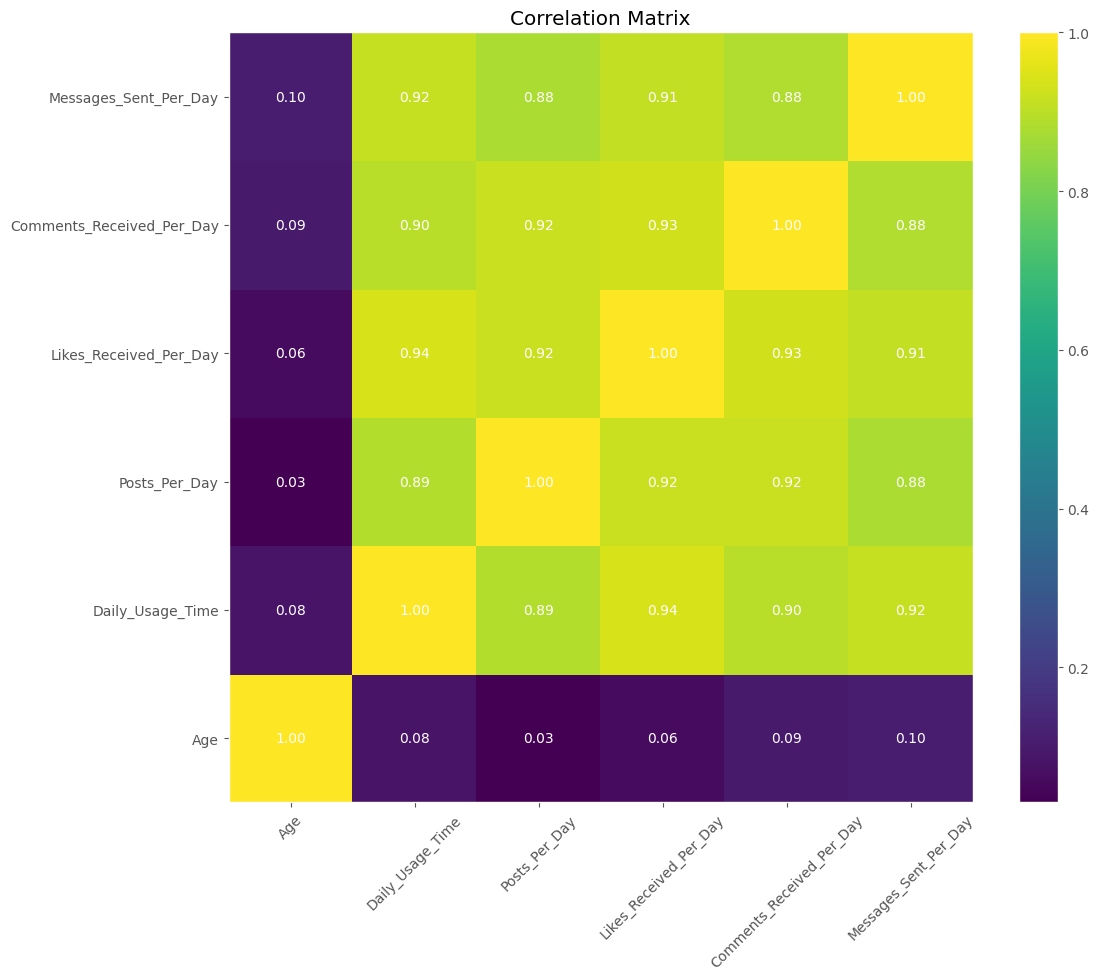

In [32]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix using only numeric columns
numeric_train_df = train_df.select_dtypes(include=[np.number])

# Ensure all columns are numeric and drop any rows with NaN values that might remain
numeric_train_df = numeric_train_df.dropna()

# Calculate the correlation matrix
correlation_matrix = numeric_train_df.corr()

# Plot the correlation matrix with annotations using matplotlib directly
plt.figure(figsize=(12, 10))
heatmap = plt.pcolor(correlation_matrix, cmap='viridis')

plt.colorbar(heatmap)
plt.xticks(np.arange(0.5, len(correlation_matrix.columns), 1), correlation_matrix.columns, rotation=45)
plt.yticks(np.arange(0.5, len(correlation_matrix.index), 1), correlation_matrix.index)

# Adding annotations
for y in range(correlation_matrix.shape[0]):
    for x in range(correlation_matrix.shape[1]):
        plt.text(x + 0.5, y + 0.5, f'{correlation_matrix.iloc[y, x]:.2f}',
                 horizontalalignment='center',
                 verticalalignment='center',
                 color='white')

plt.title('Correlation Matrix')
plt.show()

## Calculate correlation matrix using only numeric columns

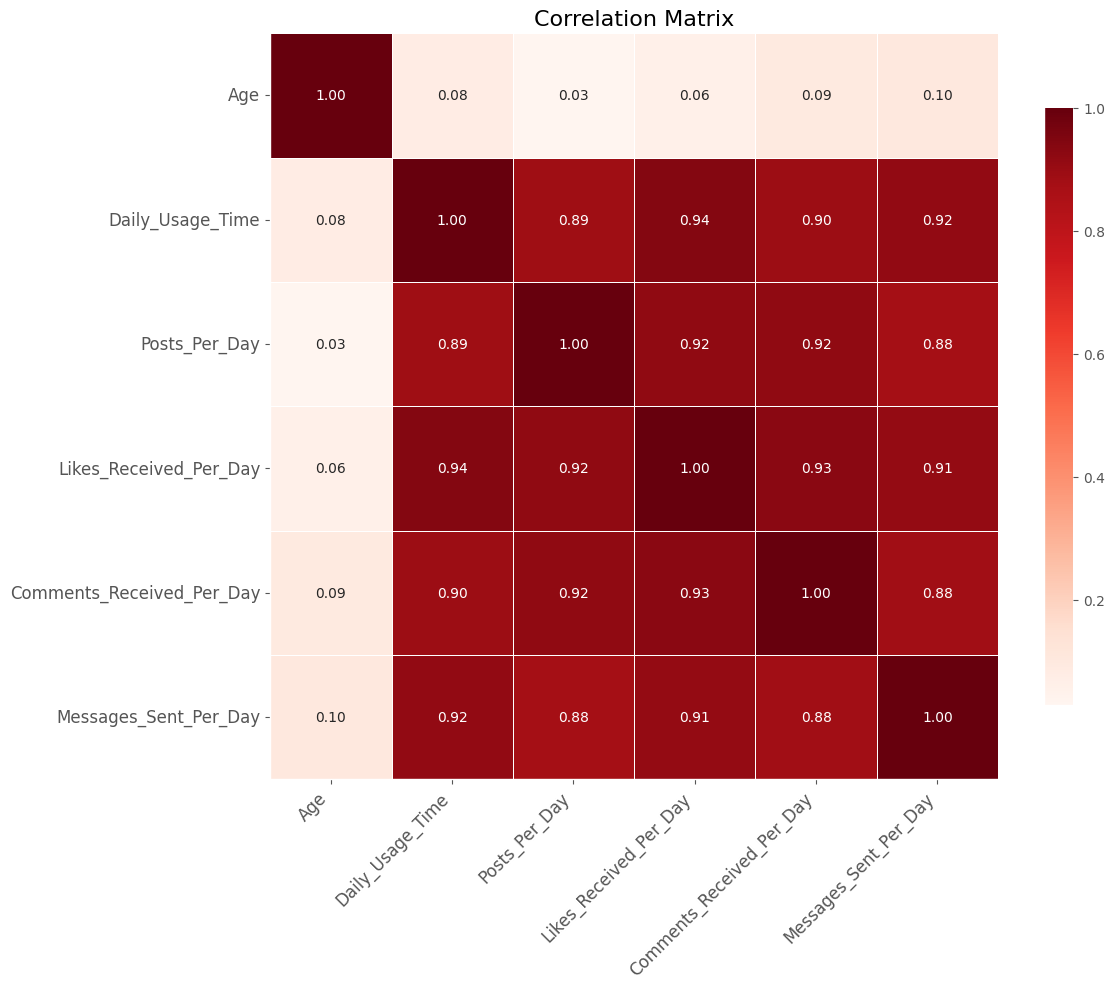

In [33]:
# Calculate correlation matrix using only numeric columns
numeric_train_df = train_df.select_dtypes(include=[np.number])

# Ensure all columns are numeric and drop any rows with NaN values that might remain
numeric_train_df = numeric_train_df.dropna()

# Calculate the correlation matrix
correlation_matrix = numeric_train_df.corr()

# Plot the correlation matrix with annotations using seaborn
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, cmap='Reds', annot=True, fmt='.2f', annot_kws={"size": 10}, linewidths=.5, cbar_kws={"shrink": .8})

# Adding labels and title
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Removing the top and right spines for a cleaner look
sns.despine()

# Show the plot
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.show()


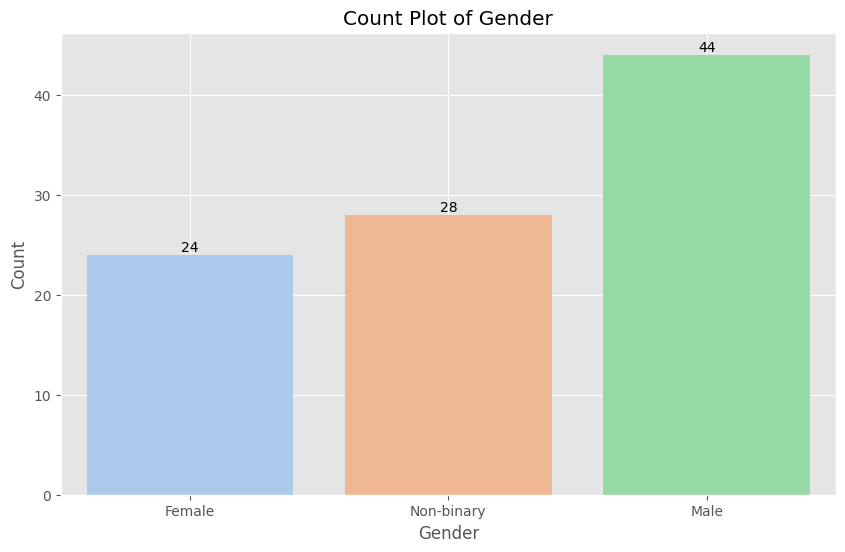

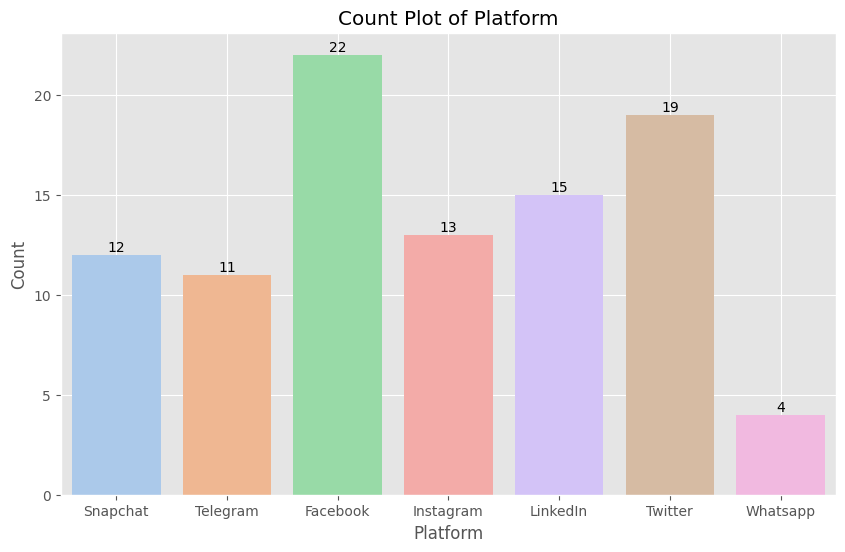

In [34]:
# List of categorical variables
categorical_vars = ['Gender', 'Platform']

# Plotting count plots for categorical variables
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=Processed_df, x=var, palette='pastel')
    plt.title(f'Count Plot of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.grid(True)
    for container in ax.containers:
        ax.bar_label(container, fmt = '%d')
    plt.show()

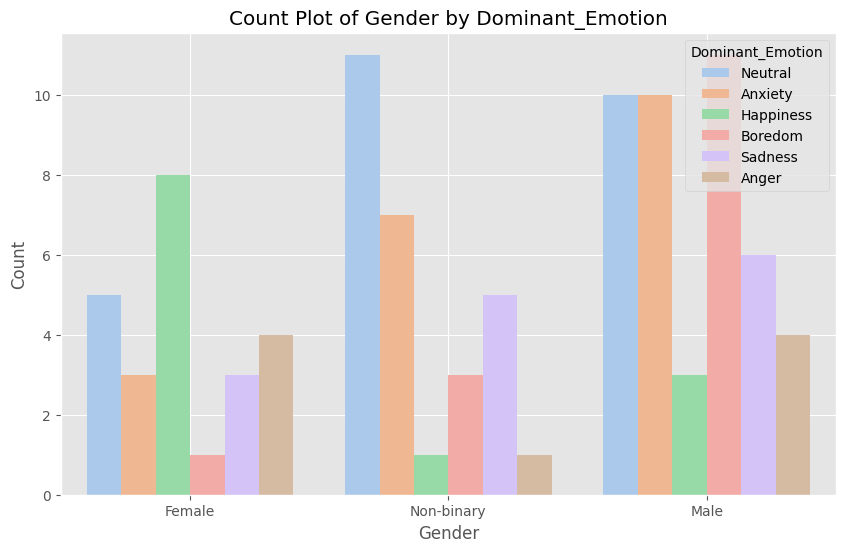

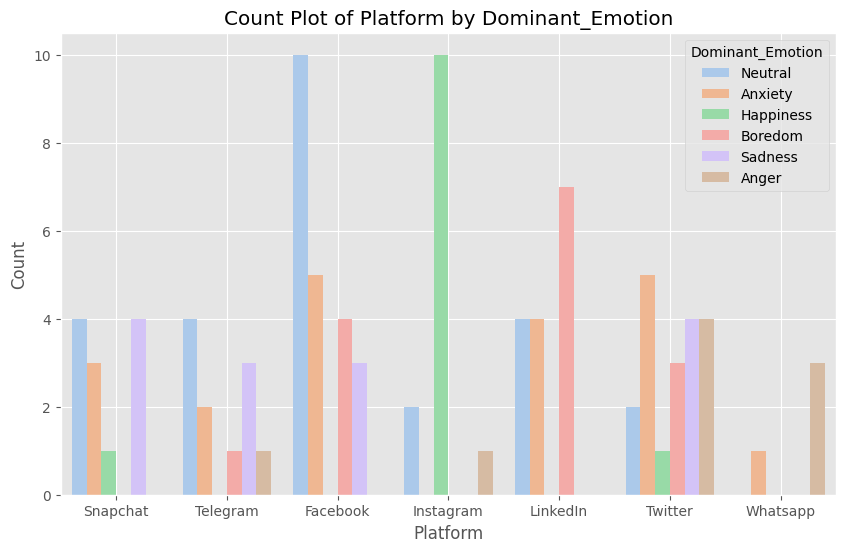

In [35]:
# Plotting count plots for categorical variables vs Exited
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=Processed_df, x=var, hue='Dominant_Emotion', palette='pastel')
    plt.title(f'Count Plot of {var} by Dominant_Emotion')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()

## Correlation Analysis  using Heatmap

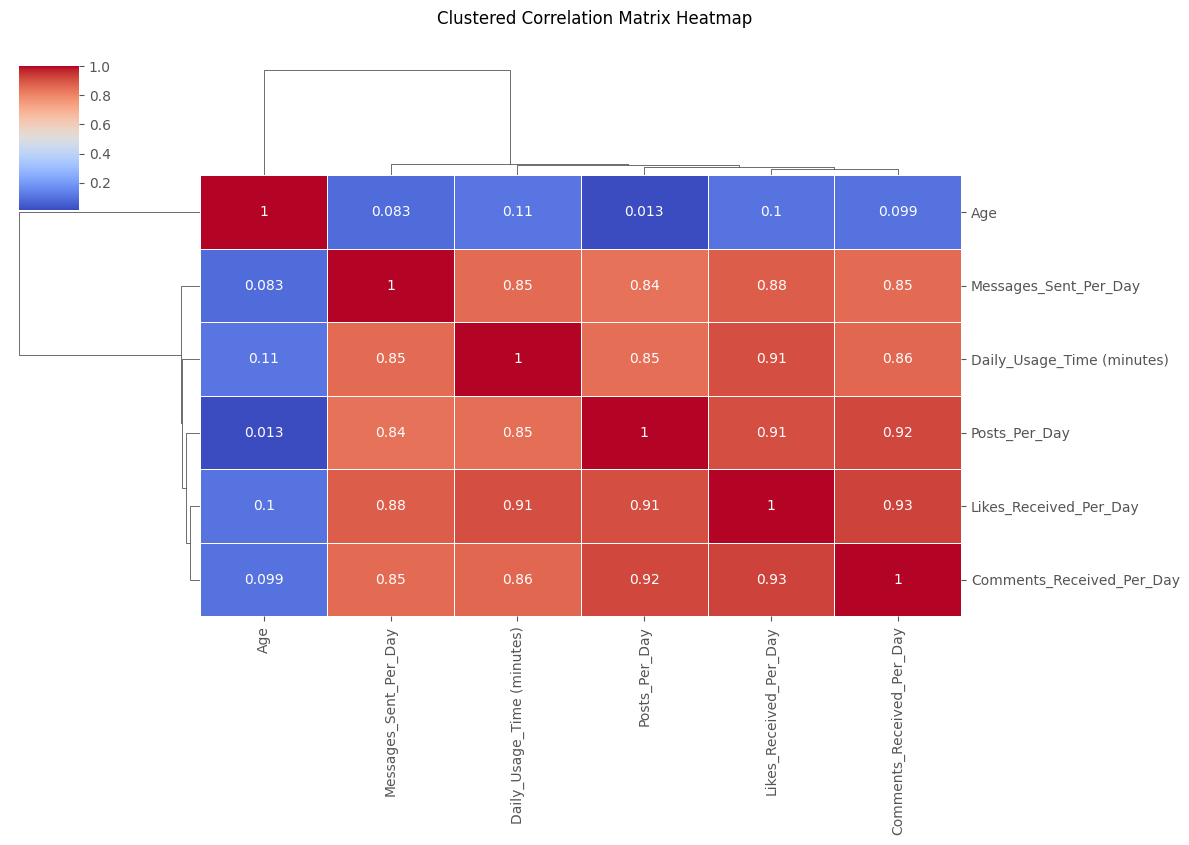

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Processed_df' and 'continuous_vars' are defined and processed correctly
# Example continuous_vars: continuous_vars = ['Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day']

# Create the clustered heatmap
clustered_heatmap = sns.clustermap(Processed_df[continuous_vars].corr(), annot=True, cmap='coolwarm', linewidths=0.5, figsize=(12, 8))

# Set the title
clustered_heatmap.fig.suptitle('Clustered Correlation Matrix Heatmap', y=1.05)

# Show the plot
plt.show()


In [ ]:
!pip install pandas plotly


## Scatter plot Social media usage

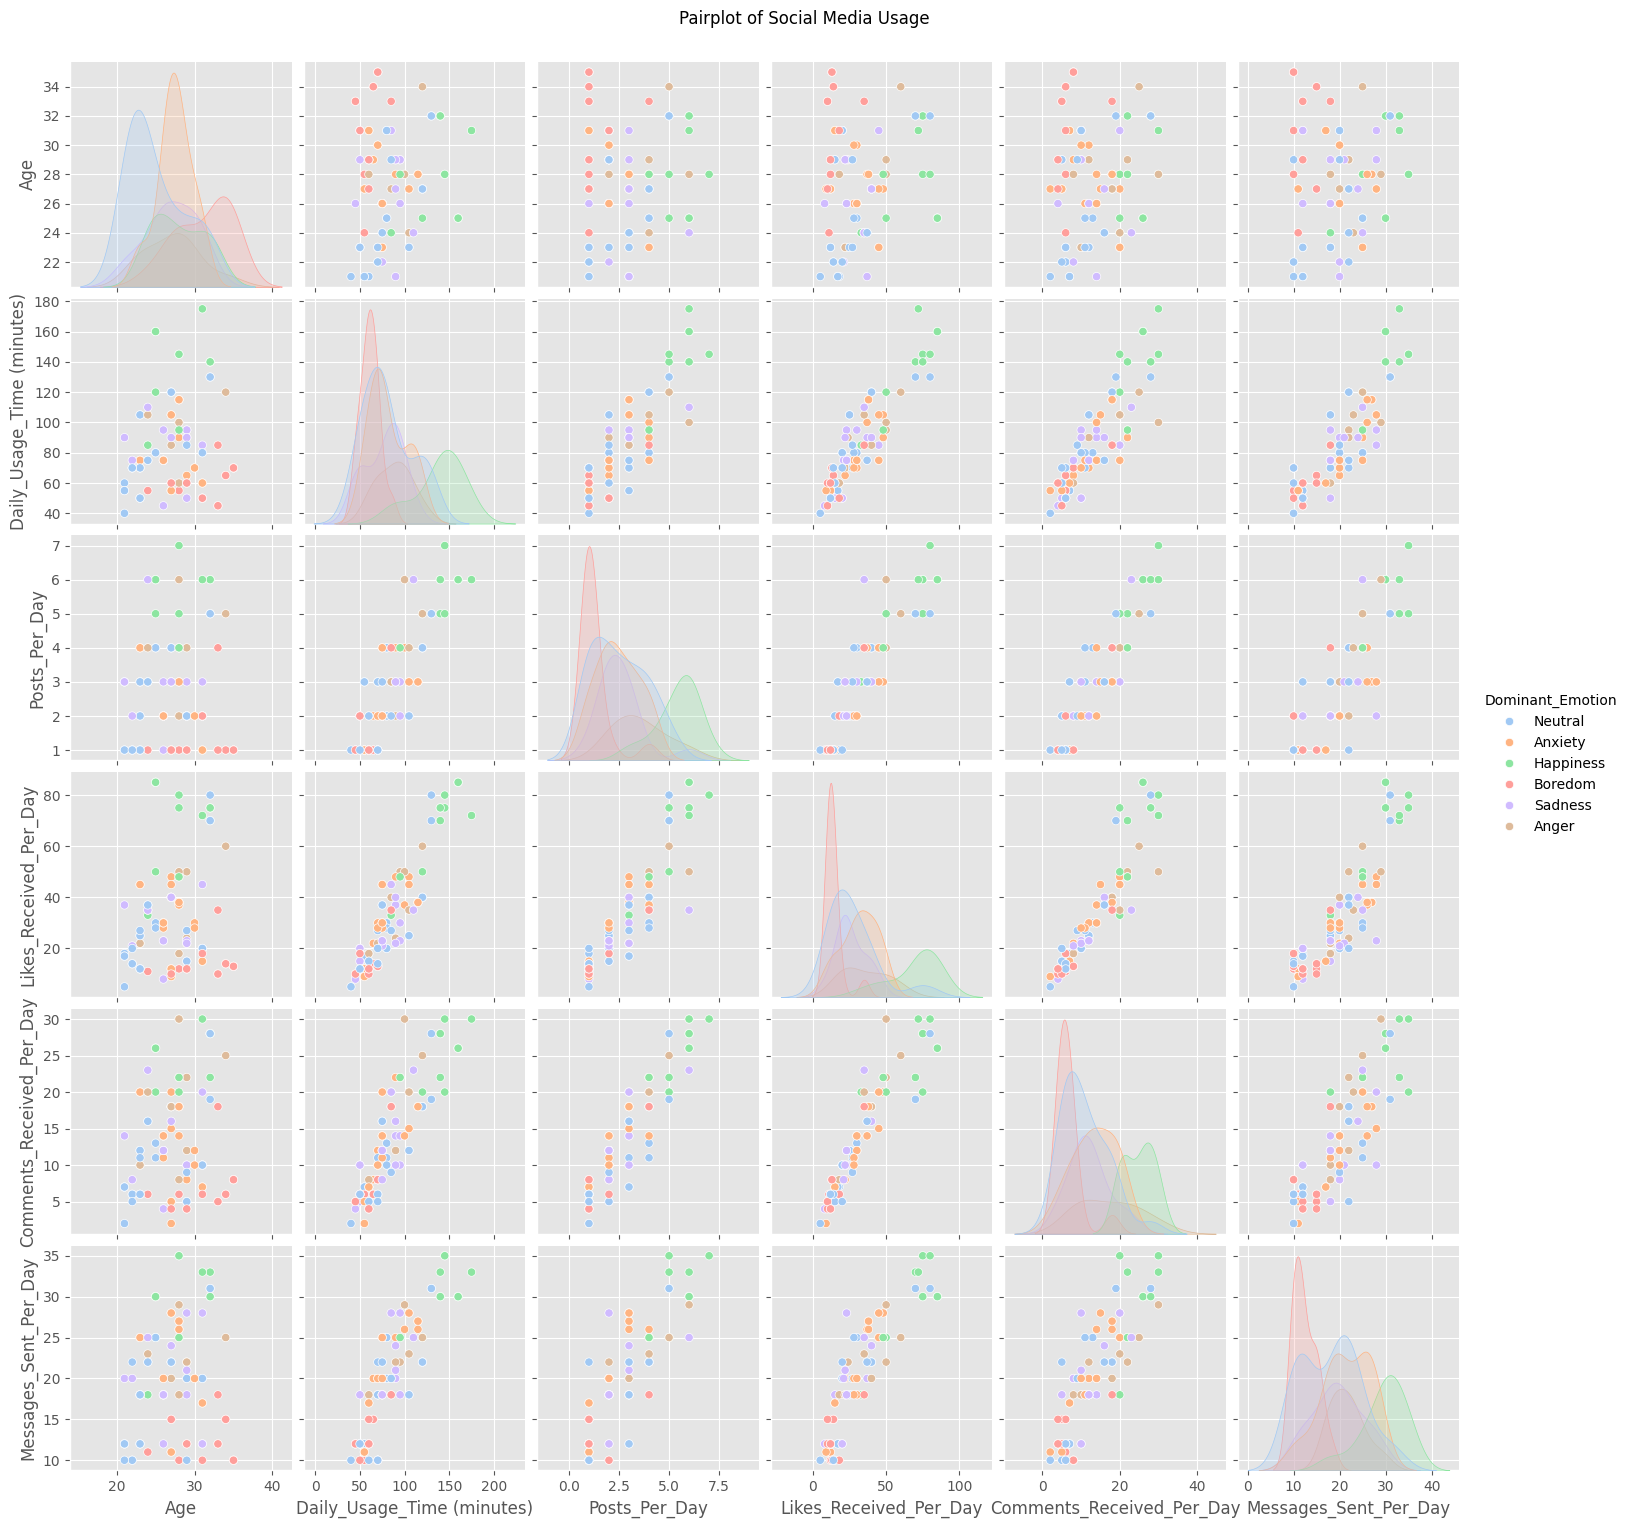

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load your dataset into a DataFrame
# Replace 'your_dataset.csv' with the actual path to your dataset
data = pd.read_csv('Processed.csv')

# Define the continuous variables
continuous_vars = ['Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day']

# Create the pair plot
sns.pairplot(data[continuous_vars + ['Dominant_Emotion']], hue='Dominant_Emotion', palette='pastel', diag_kind='kde')

# Set the title for the plot
plt.suptitle('Pairplot of Social Media Usage', y=1.02)  # Adjust y for better title positioning
plt.show()


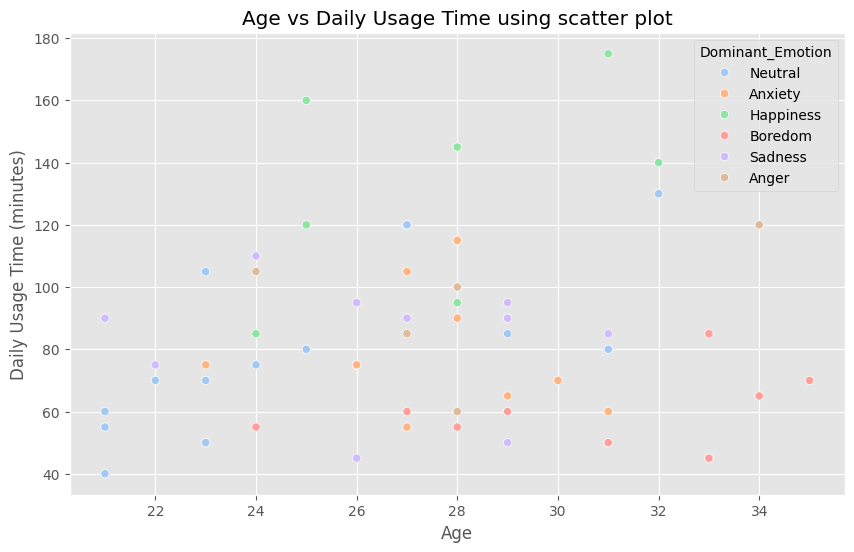

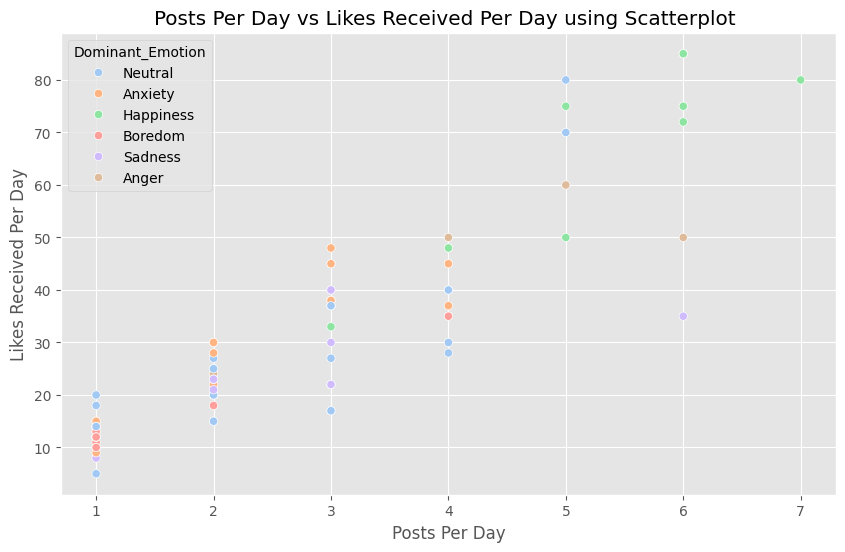

In [43]:
# Scatter plot for Age vs Daily Usage Time
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Age', y='Daily_Usage_Time (minutes)', hue='Dominant_Emotion', palette='pastel')
plt.title('Age vs Daily Usage Time using scatter plot')
plt.xlabel('Age')
plt.ylabel('Daily Usage Time (minutes)')
plt.show()

# Scatter plot for Posts Per Day vs Likes Received Per Day
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Posts_Per_Day', y='Likes_Received_Per_Day', hue='Dominant_Emotion', palette='pastel')
plt.title('Posts Per Day vs Likes Received Per Day using Scatterplot ')
plt.xlabel('Posts Per Day')
plt.ylabel('Likes Received Per Day')
plt.show()


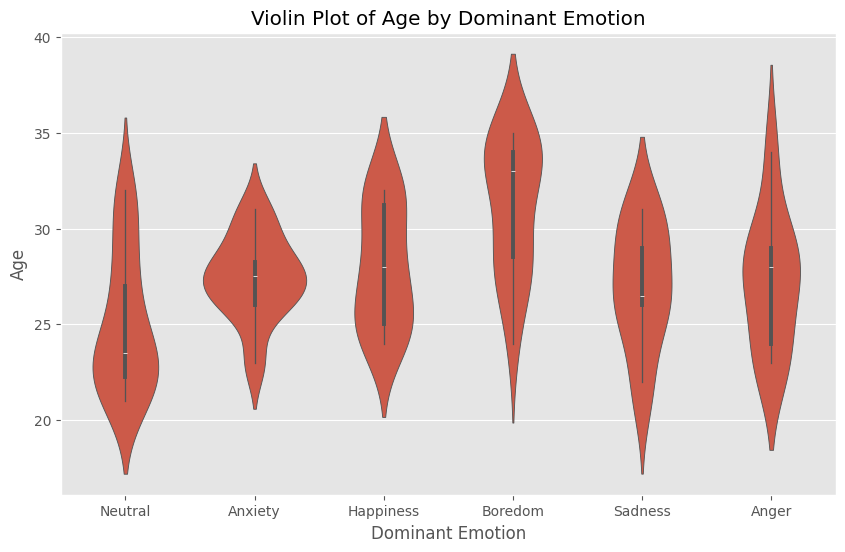

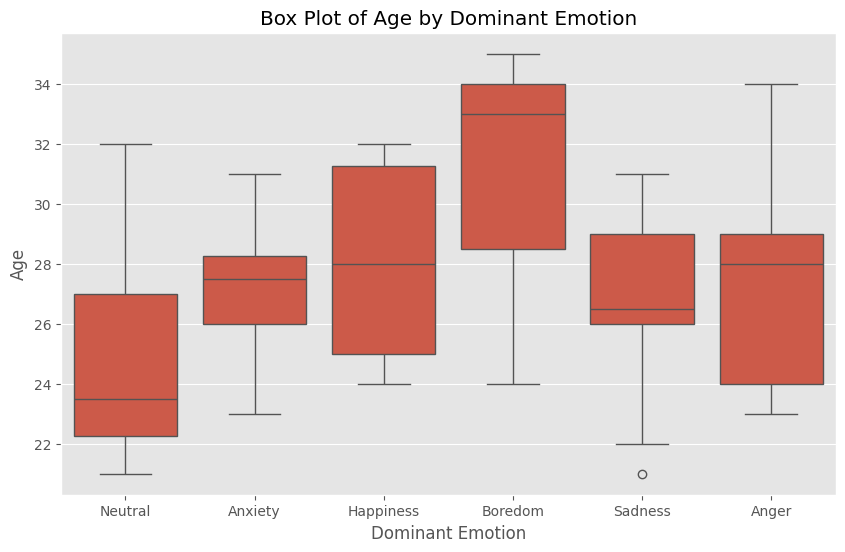

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data from the CSV file into a DataFrame
data = pd.read_csv('Processed.csv')

# Create a violin plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.violinplot(x='Dominant_Emotion', y='Age', data=data)
plt.title('Violin Plot of Age by Dominant Emotion')
plt.xlabel('Dominant Emotion')
plt.ylabel('Age')
plt.show()

# Create a box plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.boxplot(x='Dominant_Emotion', y='Age', data=data)
plt.title('Box Plot of Age by Dominant Emotion')
plt.xlabel('Dominant Emotion')
plt.ylabel('Age')
plt.show()


In [ ]:

pip install holoviews hvplot


In [44]:
import pandas as pd
import holoviews as hv
import hvplot.pandas

# Initialize Holoviews extension
hv.extension('bokeh')

# Load the CSV data into a DataFrame
data = pd.read_csv('train.csv')

# Create a DataFrame that represents the connections for the chord diagram
# We'll create connections based on the combination of Platform and Dominant_Emotion
connections = data.groupby(['Platform', 'Dominant_Emotion']).size().reset_index(name='count')

# Create the chord diagram
chord = hv.Chord(connections)

# Add labels and set the layout
chord = chord.opts(
    node_color='index',
    edge_color='Platform',
    edge_cmap='Category20',
    labels='index',
    cmap='Category20',
    width=800,
    height=800,
    title='Chord Diagram of Social Media Usage'
)

# Show the chord diagram
hv.output(chord)


:Chord   [Platform,Dominant_Emotion]   (count)

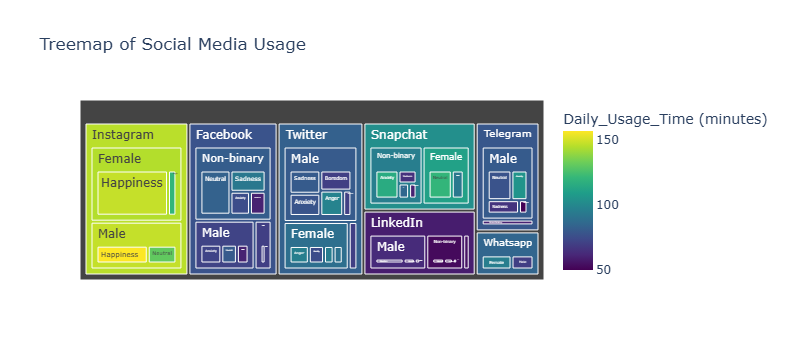

In [45]:
import pandas as pd
import plotly.express as px
import pandas as pd
# Load the data into a DataFrame
data = pd.read_csv('Processed.csv')

# Ensure that the column names are correctly loaded
data.columns = [
    'User_ID', 'Age', 'Gender', 'Platform', 'Daily_Usage_Time (minutes)',
    'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
    'Messages_Sent_Per_Day', 'Dominant_Emotion'
]

# Create the treemap
fig = px.treemap(
    data,
    path=['Platform', 'Gender', 'Dominant_Emotion'],
    values='Daily_Usage_Time (minutes)',
    color='Daily_Usage_Time (minutes)',
    color_continuous_scale='Viridis',
    title='Treemap of Social Media Usage'
)

# Show the treemap
fig.show()


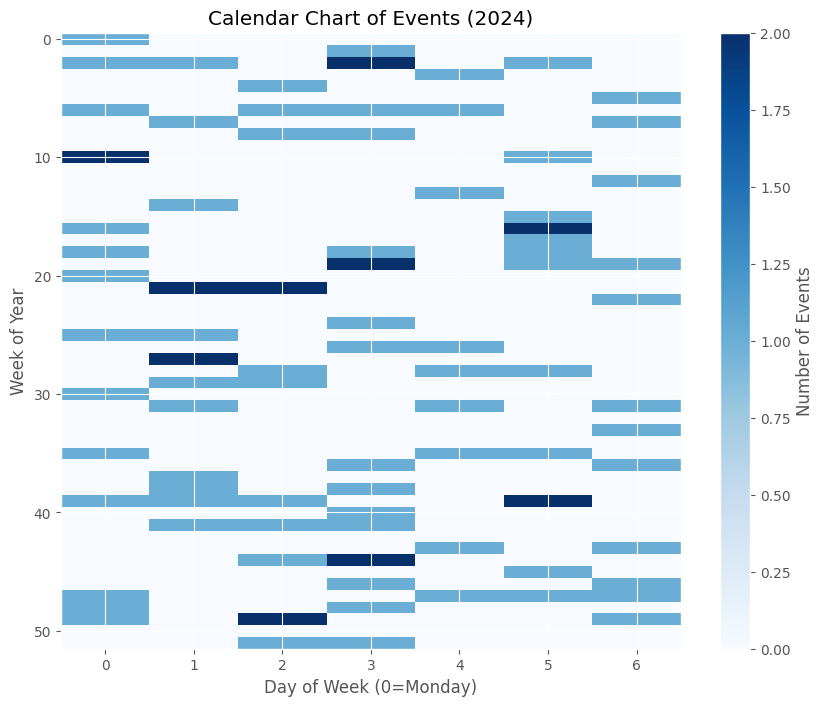

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Read the CSV file
df = pd.read_csv('Processed.csv')

# Define a start date and end date for the calendar (assuming a non-leap year)
start_date = datetime(2024, 1, 1)  # Assuming January 1st, 2024 as the start date
end_date = datetime(2024, 12, 31)  # Assuming December 31st, 2024 as the end date

# Generate a range of dates
date_range = pd.date_range(start=start_date, end=end_date)

# Assign each event to a specific date within the date range
df['Date'] = np.random.choice(date_range, size=len(df))

# Count the occurrences of each date in the DataFrame
event_counts = df['Date'].value_counts()

# Create an empty DataFrame to store the counts for each date
calendar_df = pd.DataFrame({'Date': date_range})

# Merge the counts into the calendar DataFrame
calendar_df = calendar_df.merge(event_counts, how='left', left_on='Date', right_index=True)

# Fill missing values (dates with no events) with 0
calendar_df['count'] = calendar_df['count'].fillna(0)

# Reshape the data for plotting
num_weeks = len(calendar_df) // 7
calendar_data = calendar_df['count'].values[:num_weeks * 7].reshape((num_weeks, 7))

# Plot the calendar chart
plt.figure(figsize=(10, 8))
plt.imshow(calendar_data, cmap='Blues', aspect='auto')
plt.colorbar(label='Number of Events')
plt.title('Calendar Chart of Events (2024)')
plt.xlabel('Day of Week (0=Monday)')
plt.ylabel('Week of Year')
plt.show()


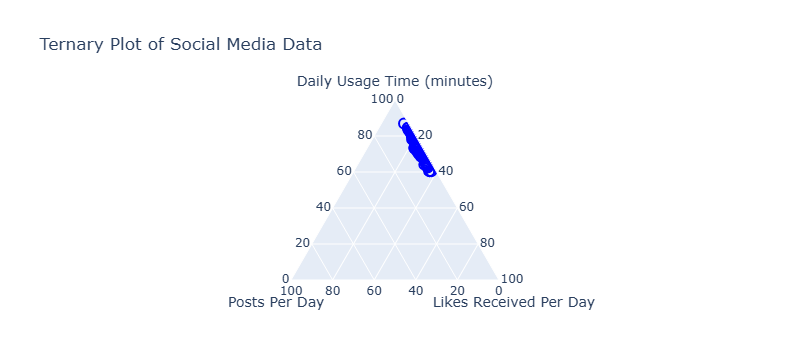

In [47]:
import pandas as pd
import plotly.graph_objects as go

# Read the CSV file
df = pd.read_csv('Processed.csv')

# Define the ternary data
a = df['Daily_Usage_Time (minutes)']
b = df['Posts_Per_Day']
c = df['Likes_Received_Per_Day']

# Create the ternary plot
fig = go.Figure(go.Scatterternary({
    'mode': 'markers',
    'a': a,
    'b': b,
    'c': c,
    'text': df['Platform'],  # Text displayed on hover
    'marker': {
        'symbol': 100,
        'color': 'blue',
        'size': 10,
        'line': {'width': 2}
    }
}))

# Update layout with ternary axis properties
fig.update_layout({
    'ternary': {
        'sum': 100,  # Sum of the values along the three axes
        'aaxis': {'title': 'Daily Usage Time (minutes)'},
        'baxis': {'title': 'Posts Per Day'},
        'caxis': {'title': 'Likes Received Per Day'}
    },
    'title': 'Ternary Plot of Social Media Data',
    'hovermode': 'closest',  # Hover mode for displaying data on hover
    'showlegend': False
})

# Show the plot
fig.show()


## Animation frame 

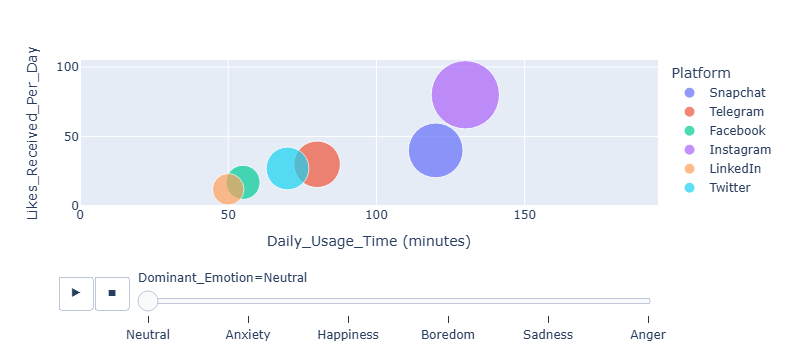

In [48]:
import plotly.express as px

# Your DataFrame (df) and column names remain unchanged
x_max = df['Daily_Usage_Time (minutes)'].max() + 20
y_max = df['Likes_Received_Per_Day'].max() + 20

fig = px.scatter(df, x="Daily_Usage_Time (minutes)", y="Likes_Received_Per_Day", animation_frame="Dominant_Emotion", animation_group="Platform",
           size="Comments_Received_Per_Day", color="Platform", hover_name="Platform",
           log_x=False, size_max=50, range_x=[0, x_max], range_y=[0, y_max])

fig.show()


In [49]:
import pandas as pd

# Load the data into a DataFrame from CSV
data = pd.read_csv('Processed.csv')

# Display the first few rows of the dataframe to ensure it's loaded correctly
print(data.head())


   User_ID   Age      Gender  Platform  Daily_Usage_Time (minutes)  \
0    500.0  27.0      Female  Snapchat                       120.0   
1    488.0  21.0  Non-binary  Snapchat                        60.0   
2    776.0  28.0  Non-binary  Snapchat                       115.0   
3    869.0  27.0        Male  Telegram                       105.0   
4    573.0  21.0  Non-binary  Facebook                        55.0   

   Posts_Per_Day  Likes_Received_Per_Day  Comments_Received_Per_Day  \
0            4.0                    40.0                       18.0   
1            1.0                    18.0                        7.0   
2            3.0                    38.0                       18.0   
3            3.0                    48.0                       20.0   
4            3.0                    17.0                        7.0   

   Messages_Sent_Per_Day Dominant_Emotion  
0                   22.0          Neutral  
1                   12.0          Neutral  
2                   

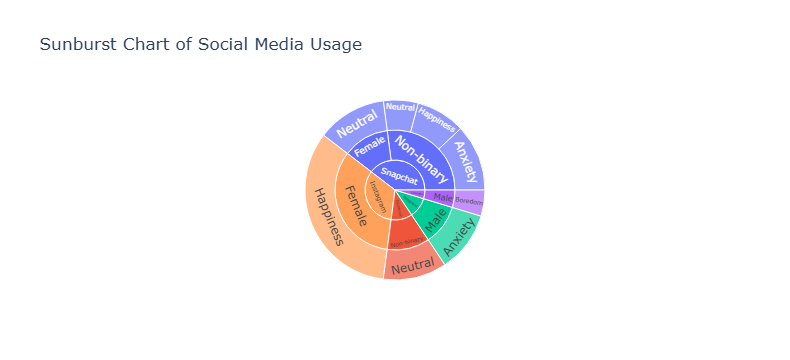

In [50]:
import pandas as pd
import plotly.express as px

# Load your CSV data
data = {
    'User_ID': [500.0, 488.0, 776.0, 869.0, 573.0, 428.0, 528.0, 773.0, 382.0, 505.0],
    'Age': [27.0, 21.0, 28.0, 27.0, 21.0, 25.0, 25.0, 21.0, 24.0, 33.0],
    'Gender': ['Female', 'Non-binary', 'Non-binary', 'Male', 'Non-binary', 'Female', 'Female', 'Non-binary', 'Non-binary', 'Male'],
    'Platform': ['Snapchat', 'Snapchat', 'Snapchat', 'Telegram', 'Facebook', 'Instagram', 'Instagram', 'Facebook', 'Snapchat', 'LinkedIn'],
    'Daily_Usage_Time (minutes)': [120.0, 60.0, 115.0, 105.0, 55.0, 160.0, 160.0, 55.0, 85.0, 45.0],
    'Posts_Per_Day': [4.0, 1.0, 3.0, 3.0, 3.0, 6.0, 6.0, 3.0, 3.0, 1.0],
    'Likes_Received_Per_Day': [40.0, 18.0, 38.0, 48.0, 17.0, 85.0, 85.0, 17.0, 33.0, 10.0],
    'Comments_Received_Per_Day': [18.0, 7.0, 18.0, 20.0, 7.0, 26.0, 26.0, 7.0, 20.0, 5.0],
    'Messages_Sent_Per_Day': [22.0, 12.0, 27.0, 28.0, 12.0, 30.0, 30.0, 12.0, 18.0, 12.0],
    'Dominant_Emotion': ['Neutral', 'Neutral', 'Anxiety', 'Anxiety', 'Neutral', 'Happiness', 'Happiness', 'Neutral', 'Happiness', 'Boredom']
}
df = pd.DataFrame(data)

# Create a sunburst chart
fig = px.sunburst(
    df,
    path=['Platform', 'Gender', 'Dominant_Emotion'],
    values='Daily_Usage_Time (minutes)',
    color='Platform',
    title='Sunburst Chart of Social Media Usage'
)

# Show the plot
fig.show()


## 3 D visualization

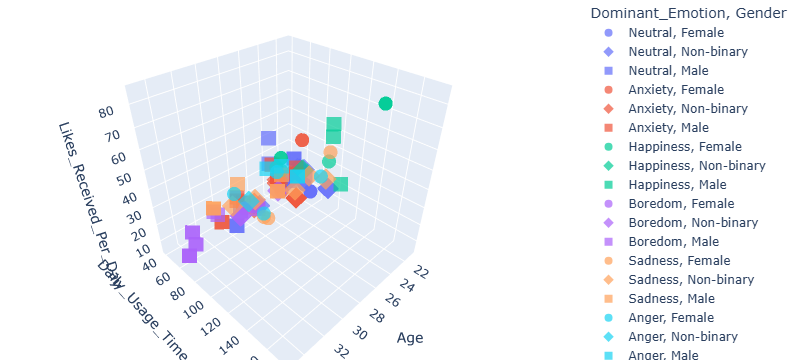

In [53]:
# Create a customized 3D scatter plot
fig = px.scatter_3d(Processed_df, x='Age', y='Daily_Usage_Time (minutes)', z='Likes_Received_Per_Day',color='Dominant_Emotion', symbol='Gender', size_max=18, opacity=0.7)

# Set a tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()